#### Obs: As imagens geradas ensse notebook serão salvas na pasta reports/figures na raiz deste projeto

### Configurações iniciais e importações

In [2]:
# manipulação
import pandas as pd
import numpy as np

# visualização
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# configs gerais de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
import os


### Carregamento dos datasets processados

In [3]:
# Caminhos dos arquivos processados
data_path = '../data/processed/imdb_clean.csv'
data_scaled_path = '../data/processed/imdb_clean_scaled.csv'
data_tfidf_path = '../data/processed/imdb_clean_tfidf.csv'
data_svd_path = '../data/processed/imdb_clean_svd.csv'

# Carregando datasets
data = pd.read_csv(data_path)
data_scaled = pd.read_csv(data_scaled_path)
data_tfidf = pd.read_csv(data_tfidf_path)
data_svd = pd.read_csv(data_svd_path)

print("Datasets carregados com sucesso")
print("data:", data.shape, "data_scaled:", data_scaled.shape)
print("data_tfidf:", data_tfidf.shape, "data_svd:", data_svd.shape)


Datasets carregados com sucesso
data: (830, 53) data_scaled: (830, 53)
data_tfidf: (830, 532) data_svd: (830, 132)


### Distribuições pós-limpeza e escalonamento

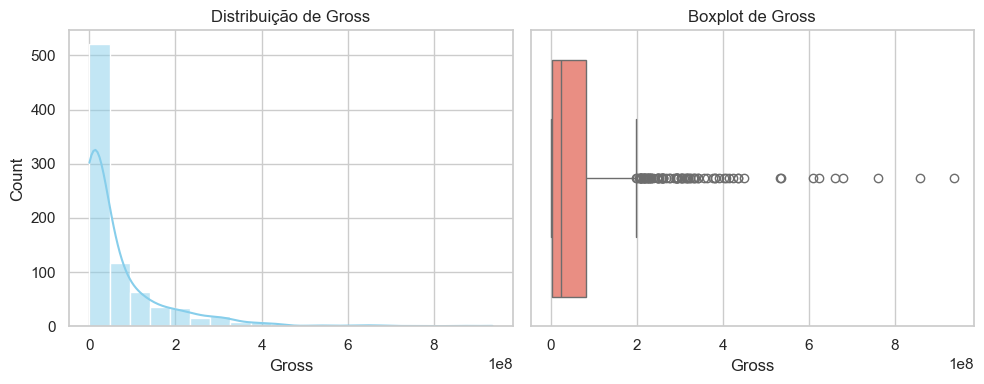

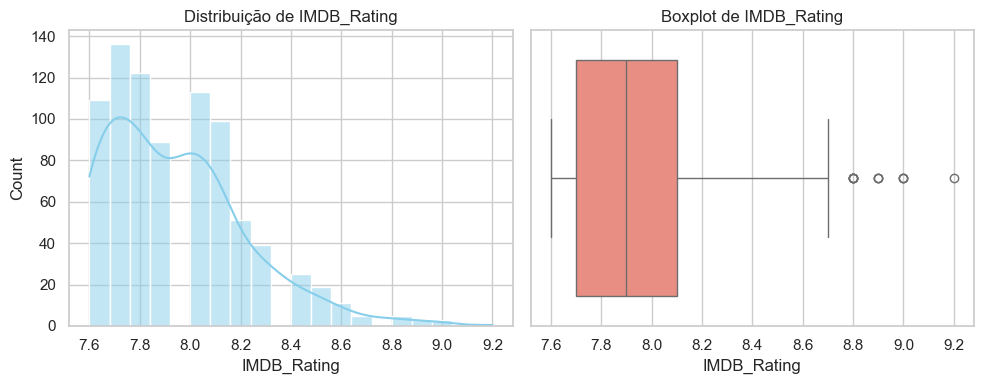

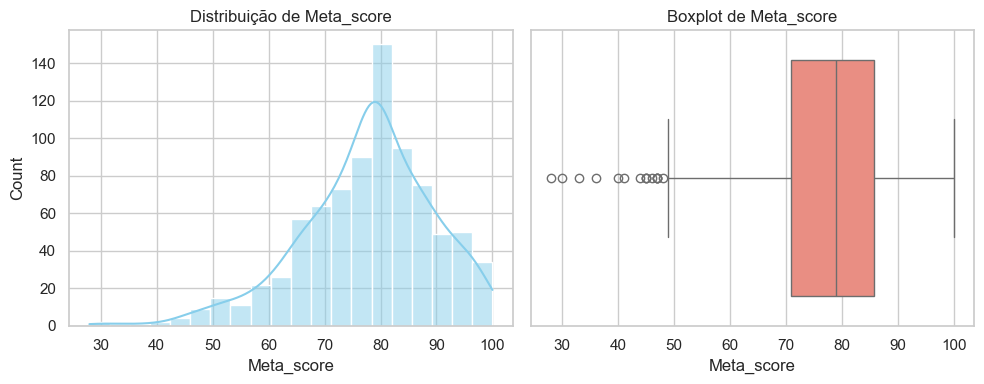

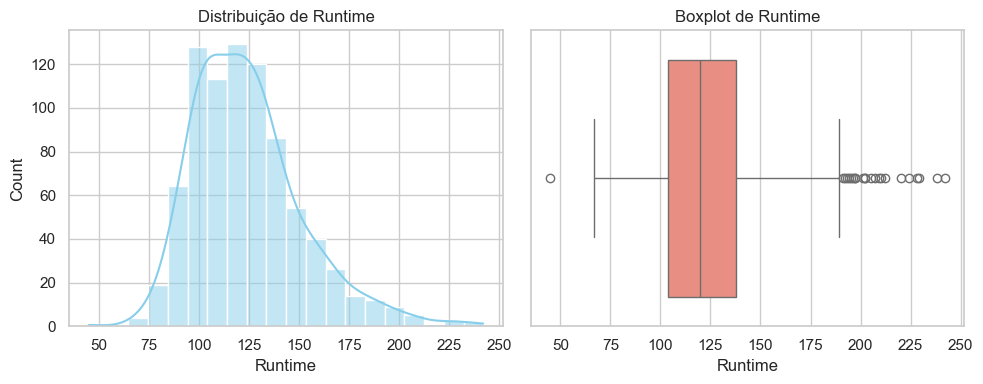

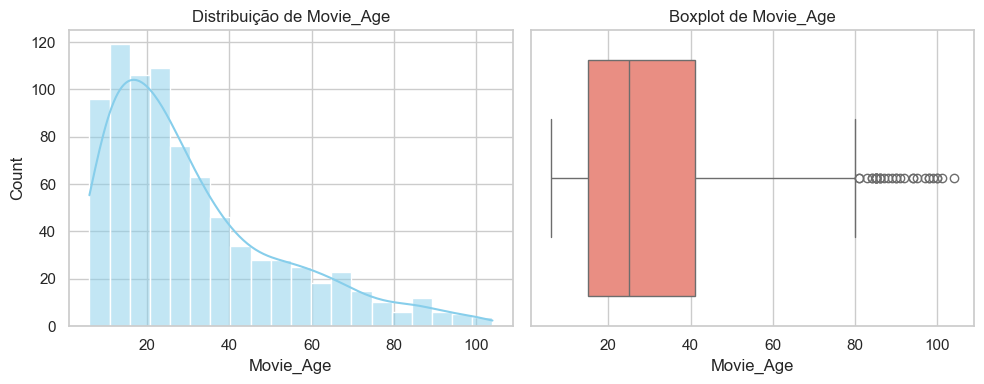


Figuras salvas com sucesso na pasta: '../reports/figures'


In [4]:
# diretório de saída para as figuras
output_dir = "../reports/figures"
os.makedirs(output_dir, exist_ok=True)

# Lista de colunas numéricas para plotar
numeric_cols = ['Gross', 'IMDB_Rating', 'Meta_score', 'Runtime', 'Movie_Age']

# Loop para criar e salvar um gráfico para cada coluna
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    # Gráfico de Distribuição (Histograma)
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, color="skyblue", bins=20)
    plt.title(f"Distribuição de {col}")

    # Gráfico de Boxplot para ver outliers
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], color="salmon")
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()

    # 1 arquivo pra cada gráfico
    file_name = f"distribuicao_{col.lower()}.png"
    full_path = os.path.join(output_dir, file_name)
    plt.savefig(full_path)
    plt.show()

print(f"\nFiguras salvas com sucesso na pasta: '{output_dir}'")

### Relação entre features categóricas e alvos

#### Diretores x Gross / IMDB_Rating

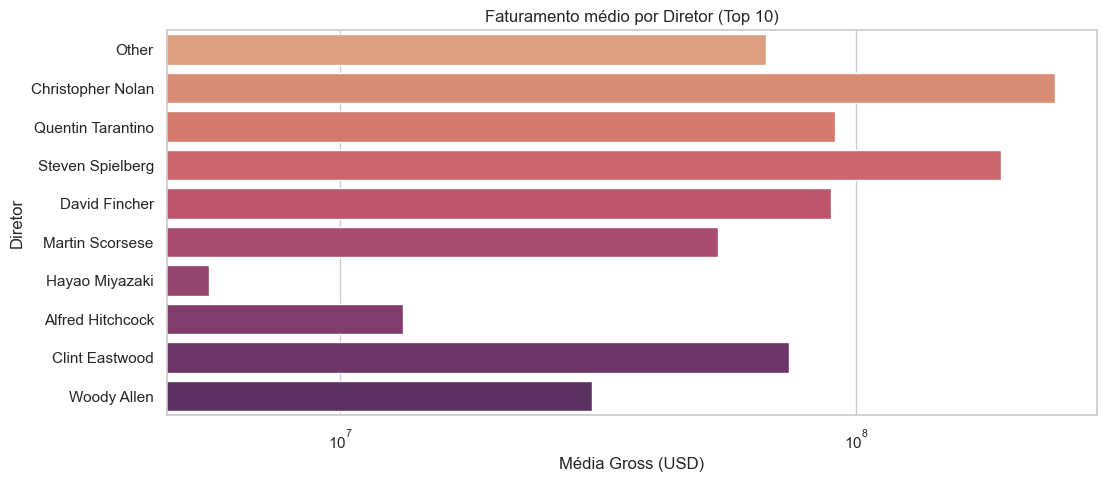

In [5]:
top_directors = data['Director_clean'].value_counts().index[:10]

plt.figure(figsize=(12,5))
sns.barplot(
    x='Gross', y='Director_clean',
    data=data[data['Director_clean'].isin(top_directors)],
    estimator=np.mean, errorbar=None, palette="flare",
    legend=False, hue='Director_clean',
)
plt.title("Faturamento médio por Diretor (Top 10)")
plt.xlabel("Média Gross (USD)")
plt.ylabel("Diretor")
plt.xscale("log")
plt.savefig("../reports/figures/director_gross.png")
plt.show()

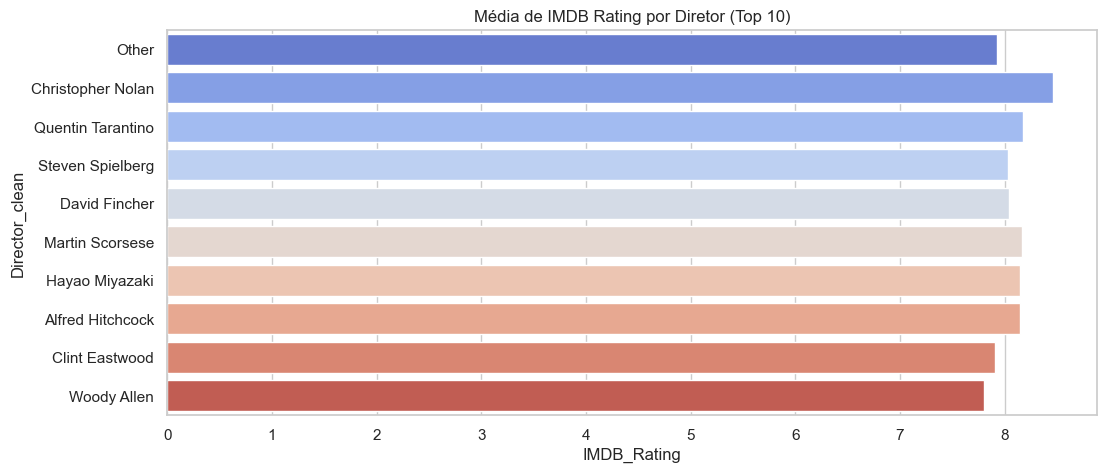

In [6]:
plt.figure(figsize=(12,5))
sns.barplot(
    x='IMDB_Rating', y='Director_clean',
    data=data[data['Director_clean'].isin(top_directors)],
    estimator=np.mean, errorbar=None, palette="coolwarm",
    legend=False, hue='Director_clean',
)
plt.title("Média de IMDB Rating por Diretor (Top 10)")
plt.savefig("../reports/figures/rating_director.png")
plt.show()


#### Atores x Gross / IMDB_Rating

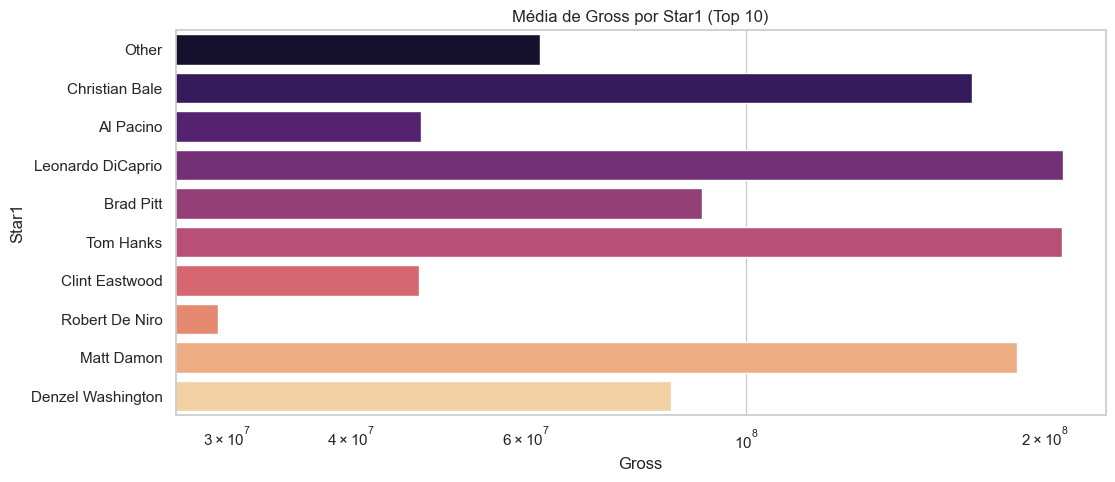

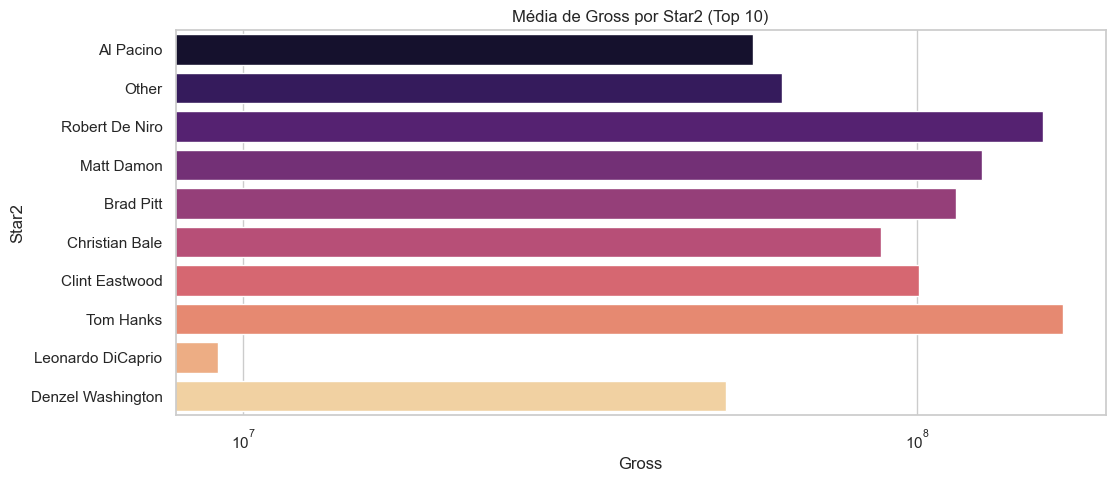

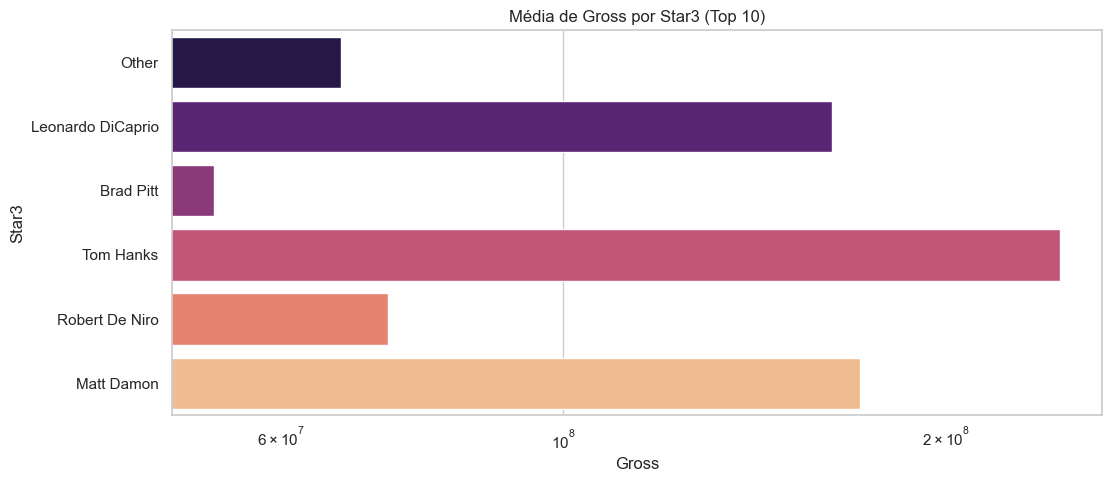

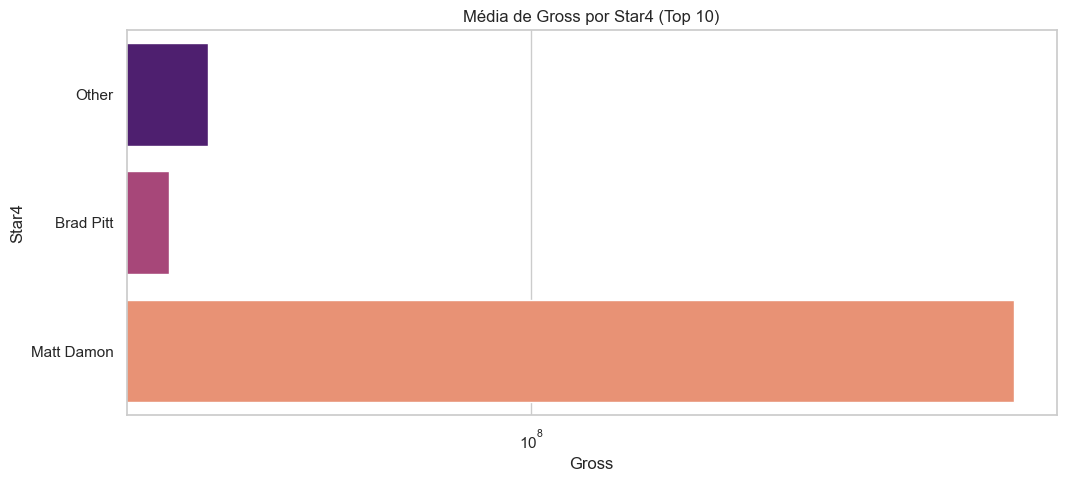

In [7]:
top_actors = pd.concat([data['Star1'], data['Star2'], data['Star3'], data['Star4']]).value_counts().index[:10]

for col in ['Star1','Star2','Star3','Star4']:
    plt.figure(figsize=(12,5))
    sns.barplot(
        x='Gross', y=col,
        data=data[data[col].isin(top_actors)],
        estimator=np.mean, errorbar=None, palette="magma",
        legend=False, hue=col,
    )
    plt.title(f"Média de Gross por {col} (Top 10)")

    plt.xscale("log")
    plt.savefig("../reports/figures/star_gross.png")
    plt.show()


### Insights de gênero (Main_Genre e multi-label Genre)

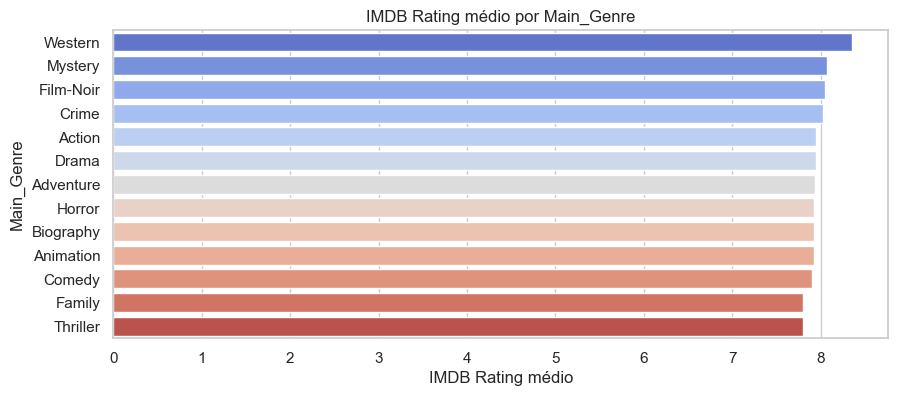

In [8]:
# Main_Genre
rating_genre = data.groupby("Main_Genre")['IMDB_Rating'].mean().sort_values(ascending=False)
gross_genre = data.groupby("Main_Genre")['Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=rating_genre.values, y=rating_genre.index, palette="coolwarm", hue=rating_genre.index, legend=False)
plt.title("IMDB Rating médio por Main_Genre")
plt.xlabel("IMDB Rating médio")
plt.savefig("../reports/figures/imdb_genre.png")
plt.show()

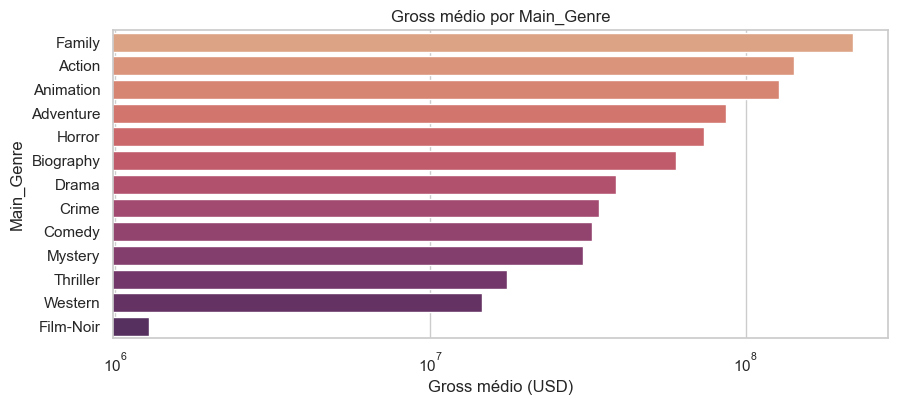

In [9]:
plt.figure(figsize=(10,4))
sns.barplot(x=gross_genre.values, y=gross_genre.index, palette="flare", hue=gross_genre.index, legend=False)
plt.title("Gross médio por Main_Genre")
plt.xlabel("Gross médio (USD)")
plt.xscale("log")
plt.savefig("../reports/figures/maingenre_gross.png")
plt.show()

### Word Cloud do Overview

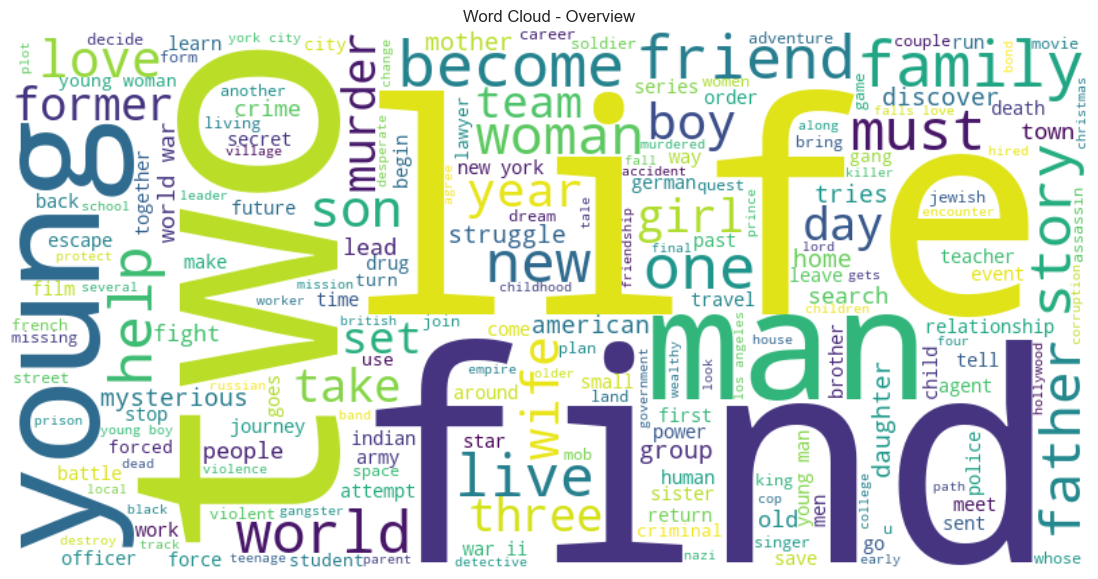

In [10]:
text = " ".join(data['Overview_clean'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Overview")
plt.savefig("../reports/figures/wordcloud.png")
plt.show()


### Correlação entre variáveis numéricas e alvo

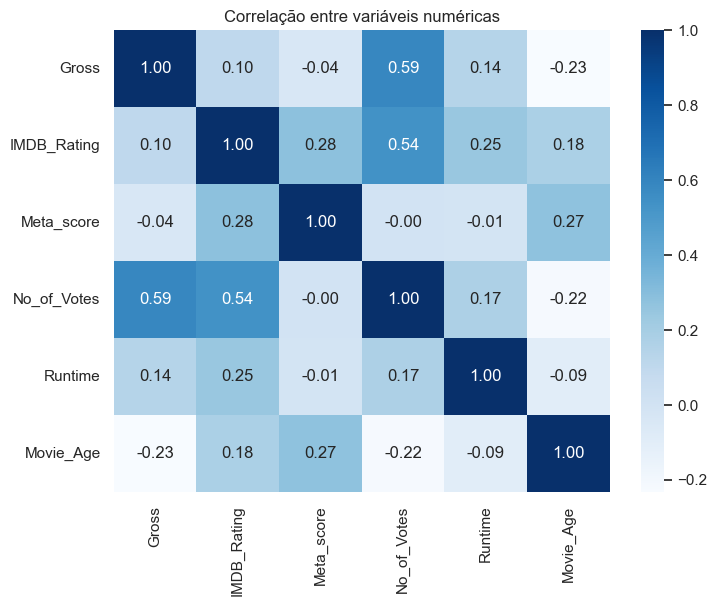

In [11]:
corr_cols = ['Gross', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Movie_Age']
corr_matrix = data[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlação entre variáveis numéricas")
plt.savefig("../reports/figures/correlation_matrix.png")
plt.show()


### Outliers pós-limpeza

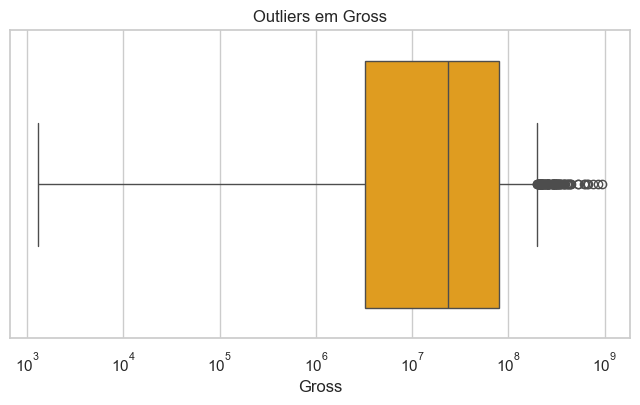

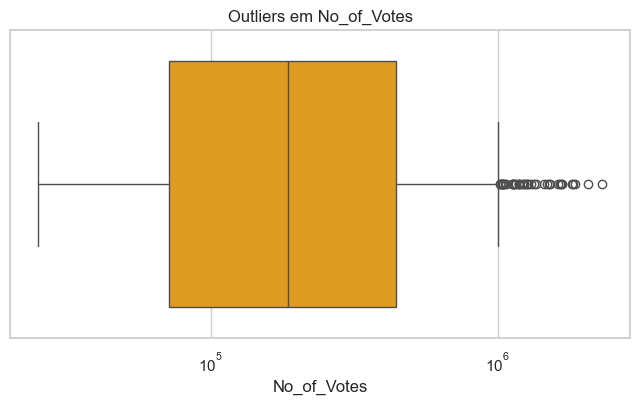

In [12]:
for col in ['Gross', 'No_of_Votes']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col], color="orange")
    plt.title(f"Outliers em {col}")
    plt.xscale("log")
    plt.savefig("../reports/figures/outliers_em.png")
    plt.show()


### Análise temporal (ano de lançamento × métricas)

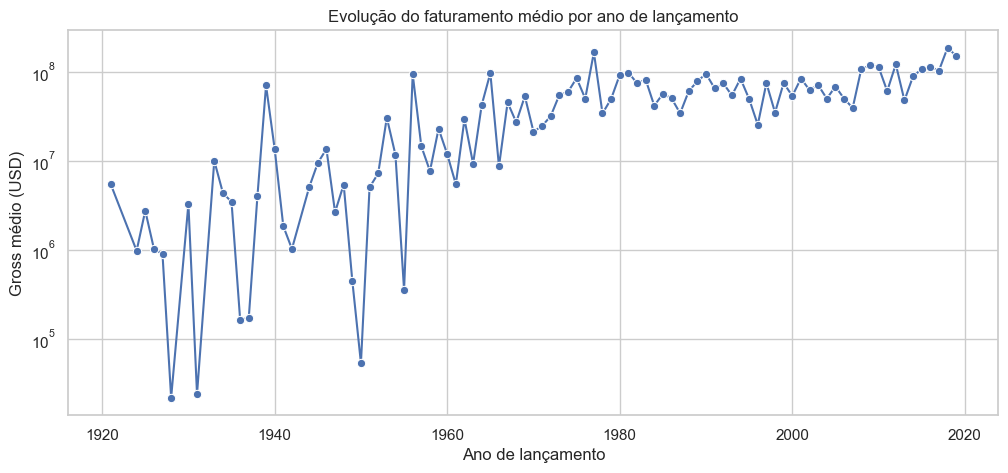

In [13]:
# Gross médio por ano
gross_year = data.groupby("Released_Year")['Gross'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=gross_year.index, y=gross_year.values, marker="o")
plt.title("Evolução do faturamento médio por ano de lançamento")
plt.xlabel("Ano de lançamento")
plt.ylabel("Gross médio (USD)")
plt.yscale("log")  # utilizado aq para reduzir efeito de outliers
plt.savefig("../reports/figures/analise_temp.png")
plt.show()

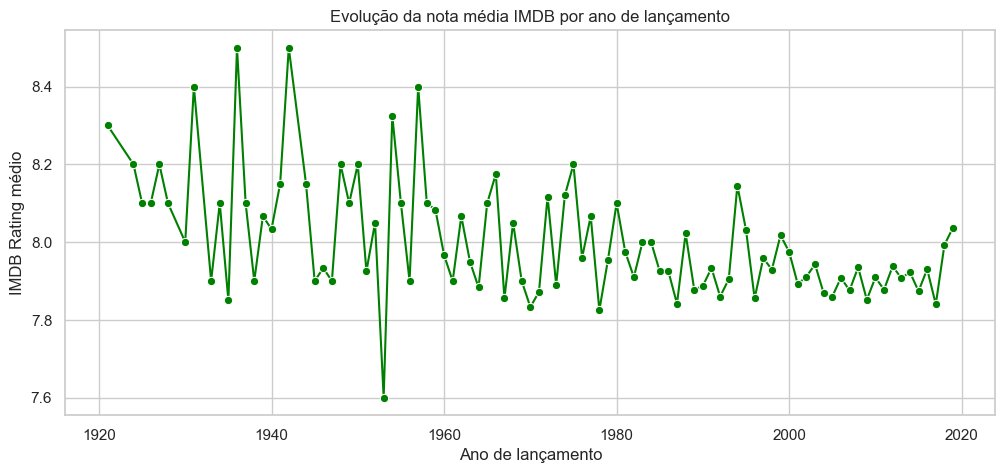

In [14]:
# IMDB Rating médio por ano
rating_year = data.groupby("Released_Year")['IMDB_Rating'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=rating_year.index, y=rating_year.values, marker="o", color="green")
plt.title("Evolução da nota média IMDB por ano de lançamento")
plt.xlabel("Ano de lançamento")
plt.ylabel("IMDB Rating médio")
plt.savefig("../reports/figures/ev_nota_media.png")
plt.show()

### Impacto da classificação etária (certificate)

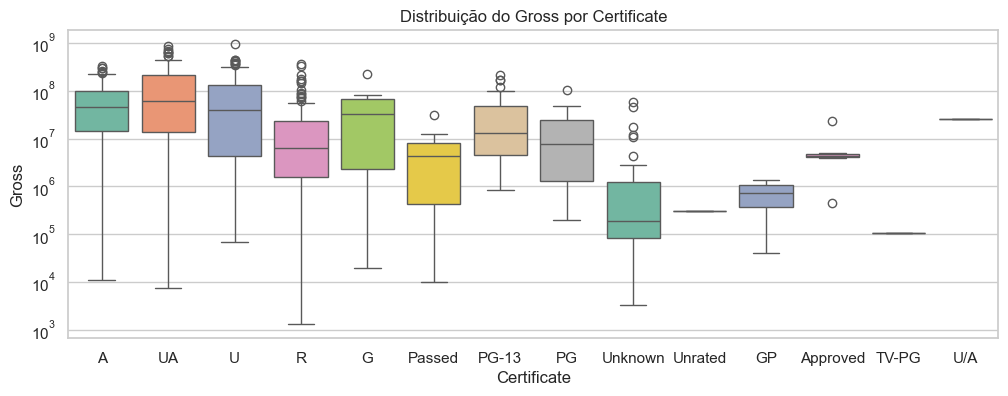

In [15]:
plt.figure(figsize=(12,4))
sns.boxplot(x="Certificate", y="Gross", data=data, palette="Set2", hue="Certificate", legend=False)
plt.yscale("log")
plt.title("Distribuição do Gross por Certificate")
plt.savefig("../reports/figures/boxplot_certificate.png")
plt.show()


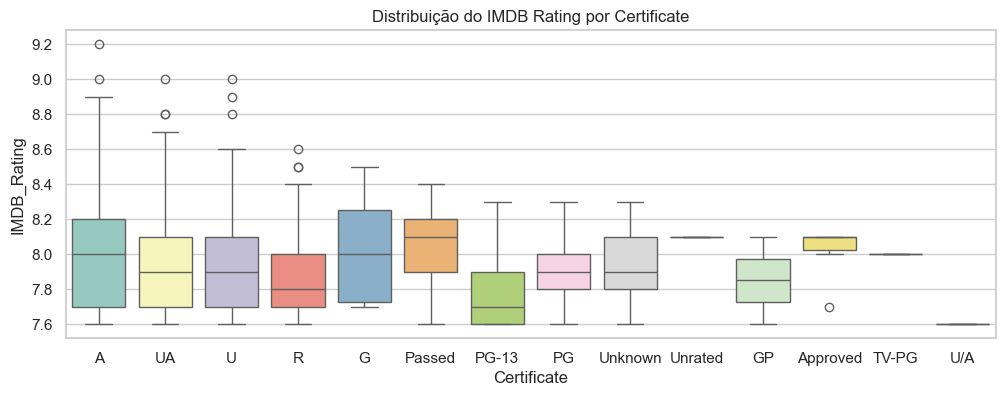

In [16]:
plt.figure(figsize=(12,4))
sns.boxplot(x="Certificate", y="IMDB_Rating", data=data, palette="Set3", hue="Certificate", legend=False)
plt.title("Distribuição do IMDB Rating por Certificate")
plt.savefig("../reports/figures/boxplot_certificate2.png")
plt.show()


### Distribuição de Movie_Age

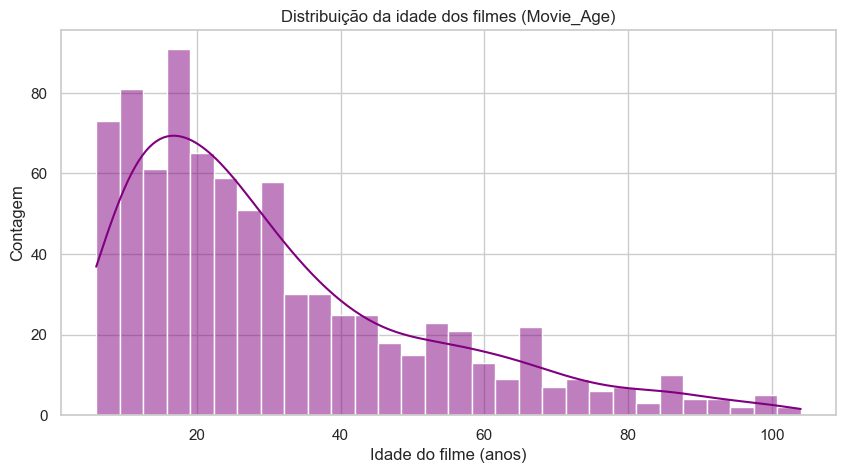

In [17]:
# Distribuição de Movie_Age

plt.figure(figsize=(10,5))
sns.histplot(data['Movie_Age'], bins=30, kde=True, color="purple")
plt.title("Distribuição da idade dos filmes (Movie_Age)")
plt.xlabel("Idade do filme (anos)")
plt.ylabel("Contagem")
plt.savefig("../reports/figures/hist_movie_age.png")
plt.show()

### Heatmap de gêneros x certificados

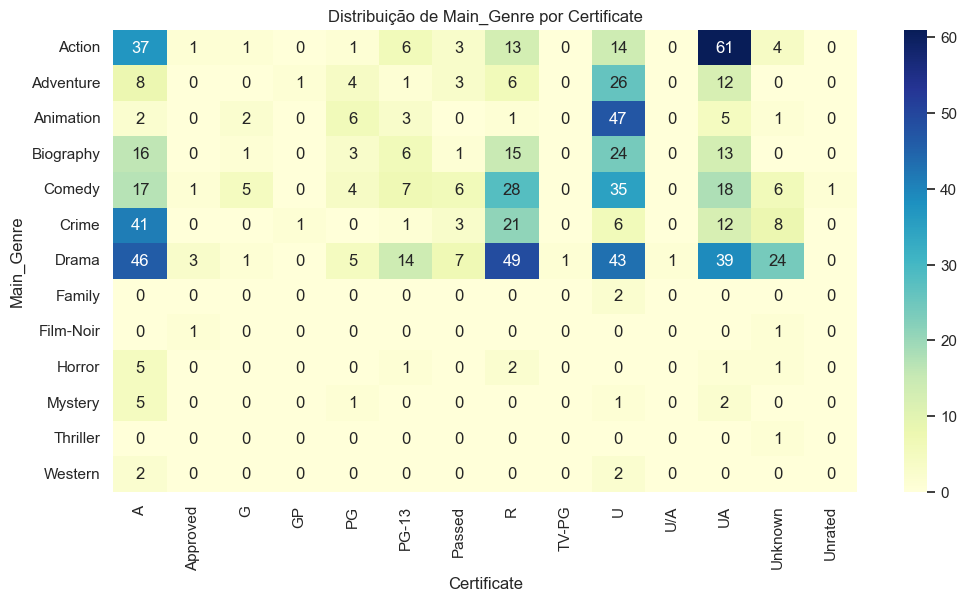

In [18]:
# Heatmap de gêneros x certificados

genre_cert = pd.crosstab(data['Main_Genre'], data['Certificate'])

plt.figure(figsize=(12,6))
sns.heatmap(genre_cert, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Distribuição de Main_Genre por Certificate")
plt.savefig("../reports/figures/heatmap.png")
plt.show()

### Top 10 filmes (Rankings)

In [19]:
# Top 10 por Gross
top_gross = data[['Series_Title','Gross']].sort_values(by="Gross", ascending=False).head(10)
print("Top 10 filmes por faturamento bruto (Gross):")
display(top_gross)

Top 10 filmes por faturamento bruto (Gross):


,Series_Title,Gross
387,Star Wars: Episode VII - The Force Awakens,936662225.0
51,Avengers: Endgame,858373000.0
507,Avatar,760507625.0
52,Avengers: Infinity War,678815482.0
535,Titanic,659325379.0
290,The Avengers,623279547.0
732,Incredibles 2,608581744.0
1,The Dark Knight,534858444.0
471,Rogue One,532177324.0
55,The Dark Knight Rises,448139099.0


In [20]:
# Top 10 por IMDB Rating
top_rating = data[['Series_Title','IMDB_Rating']].sort_values(by="IMDB_Rating", ascending=False).head(10)
print("Top 10 filmes por nota IMDB:")
display(top_rating)

Top 10 filmes por nota IMDB:


,Series_Title,IMDB_Rating
0,The Godfather,9.2
1,The Dark Knight,9.0
2,The Godfather: Part II,9.0
3,12 Angry Men,9.0
4,The Lord of the Rings: The Return of the King,8.9
5,Pulp Fiction,8.9
6,Schindler's List,8.9
7,Inception,8.8
8,Fight Club,8.8
9,The Lord of the Rings: The Fellowship of the Ring,8.8


In [21]:
# Top 10 por número de votos
top_votes = data[['Series_Title','No_of_Votes']].sort_values(by="No_of_Votes", ascending=False).head(10)
print("Top 10 filmes por número de votos:")
display(top_votes)

Top 10 filmes por número de votos:


,Series_Title,No_of_Votes
1,The Dark Knight,2303232
7,Inception,2067042
8,Fight Club,1854740
5,Pulp Fiction,1826188
10,Forrest Gump,1809221
13,The Matrix,1676426
9,The Lord of the Rings: The Fellowship of the Ring,1661481
4,The Lord of the Rings: The Return of the King,1642758
0,The Godfather,1620367
55,The Dark Knight Rises,1516346
